In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [100]:
import seaborn as sns

# Configuración general
plt.style.use('dark_background')  # Fondo oscuro

# Color de fondo personalizado (hex, RGB o nombre)
sns.set_palette("pastel")         # Paleta pastel (Seaborn)
colores_pastel = ['#A65B62', "#FFB3BA", "#FFDFBA", "#BAFFC9", "#BAE1FF", "#D0BAFF", "#F9B7FF"]
sns.set_palette(colores_pastel)

In [8]:
data = pd.read_csv('hltb_data.csv')
data

C:\Users\conid\AppData\Local\Temp\ipykernel_29620\746695557.py:1: DtypeWarning: Columns (12,14,16,17,18,19,20,24,25,26,27,28,29,30,31,88) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('hltb_data.csv')


,game_count_discussion,game_game_id,game_game_name,game_game_name_date,game_count_playing,game_count_backlog,game_count_replay,game_count_custom,game_count_comp,game_count_retired,...,review_60,review_65,review_70,review_75,review_80,review_85,review_90,review_95,review_100,review_review_count
0,0,1,688(I) Hunter/Killer,0,1,82,2,3,11,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,0,2,Beyond Good & Evil 2,0,0,80,0,3,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,0,18,'Splosion Man,0,1,302,14,17,179,43,...,13.0,1.0,20.0,NaN,21.0,1.0,14.0,NaN,4.0,79
3,0,19,.hack//G.U. Vol. 1: Rebirth,0,0,316,11,14,274,18,...,9.0,NaN,34.0,1.0,34.0,1.0,13.0,NaN,9.0,110
4,0,20,.hack//G.U. Vol. 2: Reminisce,0,0,291,5,14,165,8,...,7.0,NaN,17.0,NaN,27.0,1.0,9.0,NaN,6.0,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147469,0,164069,taptube,0,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
147470,0,164070,the homelles,0,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
147471,0,164071,tuber more or less,0,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
147472,0,164072,upgrade the game,0,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [19]:
jueguito = data[data['game_profile_steam'] == 2900]
jueguito

,game_count_discussion,game_game_id,game_game_name,game_game_name_date,game_count_playing,game_count_backlog,game_count_replay,game_count_custom,game_count_comp,game_count_retired,...,review_60,review_65,review_70,review_75,review_80,review_85,review_90,review_95,review_100,review_review_count
0,0,1,688(I) Hunter/Killer,0,1,82,2,3,11,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [37]:
total_games = data['game_game_id'].nunique()
total_games

147474

In [4]:
count_esrb = data['game_rating_esrb'].value_counts()
print('Hay {} juegos con rating ESRB'.format(count_esrb.sum()))

count_pegi = data['game_rating_pegi'].value_counts()
print('Hay {} juegos con rating PEGI'.format(count_pegi.sum()))

count_cero = data['game_rating_cero'].value_counts()
print('Hay {} juegos con rating CERO'.format(count_cero.sum()))

print('En total hay {} juegos con rating'.format(count_esrb.sum() + count_pegi.sum() + count_cero.sum()))

Hay 7160 juegos con rating ESRB
Hay 3631 juegos con rating PEGI
Hay 1872 juegos con rating CERO
En total hay 12663 juegos con rating


In [60]:
count_esrb = data['game_comp_lvl_platform'].value_counts()
count_esrb

game_comp_lvl_platform
0    147287
1       187
Name: count, dtype: int64

1.  Limpiar dataset 
2. Pregunta: ¿Existen combinaciones de géneros o características (ej: "RPG + Open World") que correlacionen con tasas de abandono excepcionalmente altas/bajas?

--> Transformacion a valores numericos generos 

--> Resumen de ajustes recomendados
Preprocesamiento:

Usar MultiLabelBinarizer para géneros.

Normalizar/normalizar features.

Modelado:

Empezar con K-Means++ y DBSCAN/OPTICS.

Reducir dimensionalidad si hay muchas features.

Evaluación:

Silhouette Score + análisis descriptivo/visual.

Alternativas:

Considerar enfoques supervisados o reglas de asociación. 


In [68]:
# Limpiamos el DataFrame, seleccionando columnas relevantes

data_clean = data[['game_game_name', 'game_game_id', 'game_count_playing', 'game_count_replay', 'game_count_replay', 'game_count_comp', 'game_count_retired', 'game_game_type', 'game_profile_platform', 'game_profile_genre', 'game_rating_esrb', 'game_comp_lvl_sp', 'game_comp_lvl_co', 'game_comp_lvl_mp' ]]

In [70]:
genres = data_clean['game_profile_genre']
genres

0                   Simulation
1            Action, Adventure
2                       Action
3         Action, Role-Playing
4         Action, Role-Playing
                  ...         
147469                     NaN
147470                     NaN
147471                     NaN
147472                     NaN
147473                     NaN
Name: game_profile_genre, Length: 147474, dtype: object

In [71]:
# Creamos una lista para almacenar los géneros únicos
genres_list = []

for game in genres:
    if pd.isna(game):  # verificamos que el género no sea NaN
        continue

    for genre in game.split(','):
        if genre.strip() not in genres_list: # revisamos si el género ya está en la lista
            genres_list.append(genre.strip()) # si no está, lo agregamos 
            print('Género agregado: {}'.format(genre.strip()))
            print('Hay {} géneros únicos'.format(len(genres_list)))

# Eliminamos los juegos que no tienen genero
print()
print('Hay {} juegos sin género'.format(data_clean['game_profile_genre'].isna().sum()))
print('Hay {} juegos con género'.format(data_clean['game_profile_genre'].notna().sum()))


Género agregado: Simulation
Hay 1 géneros únicos
Género agregado: Action
Hay 2 géneros únicos
Género agregado: Adventure
Hay 3 géneros únicos
Género agregado: Role-Playing
Hay 4 géneros únicos
Género agregado: role-playing
Hay 5 géneros únicos
Género agregado: Action RPG
Hay 6 géneros únicos
Género agregado: First-Person
Hay 7 géneros únicos
Género agregado: Shooter
Hay 8 géneros únicos
Género agregado: Racing/Driving
Hay 9 géneros únicos
Género agregado: Top-Down
Hay 10 géneros únicos
Género agregado: Puzzle
Hay 11 géneros únicos
Género agregado: Music
Hay 12 géneros únicos
Género agregado: Platform
Hay 13 géneros únicos
Género agregado: Sports
Hay 14 géneros únicos
Género agregado: Card Game
Hay 15 géneros únicos
Género agregado: Roguelike
Hay 16 géneros únicos
Género agregado: Various
Hay 17 géneros únicos
Género agregado: Arcade
Hay 18 géneros únicos
Género agregado: Visual Novel
Hay 19 géneros únicos
Género agregado: Scrolling
Hay 20 géneros únicos
Género agregado: Vertical scroll

In [72]:
# Eliminamos los juegos que no tienen genres del data principal
data_clean = data_clean[data_clean['game_profile_genre'].notna()].copy()
data_clean

,game_game_name,game_game_id,game_count_playing,game_count_replay,game_count_replay,game_count_comp,game_count_retired,game_game_type,game_profile_platform,game_profile_genre,game_rating_esrb,game_comp_lvl_sp,game_comp_lvl_co,game_comp_lvl_mp
0,688(I) Hunter/Killer,1,1,2,2,11,16,game,PC,Simulation,E,1,1,1
1,Beyond Good & Evil 2,2,0,0,0,0,1,game,NaN,"Action, Adventure",NaN,1,0,0
2,'Splosion Man,18,1,14,14,179,43,game,Xbox 360,Action,E10+,1,1,1
3,.hack//G.U. Vol. 1: Rebirth,19,0,11,11,274,18,game,"Nintendo Switch, PC, PlayStation 2, PlayStation 4","Action, Role-Playing",T,1,1,1
4,.hack//G.U. Vol. 2: Reminisce,20,0,5,5,165,8,game,"Nintendo Switch, PC, PlayStation 2, PlayStation 4","Action, Role-Playing",T,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147273,Legend of Nara,163873,0,0,0,1,0,game,Browser,"Third-Person, Action, Arcade, Battle Arena",NaN,1,0,0
147280,Mobile Suit Gundam SEED: Battle Destiny Remast...,163880,0,0,0,0,0,game,"Nintendo Switch, PC",Action,NaN,1,0,0
147281,FUBUKI ~zero in on Holoearth~ HOLOLIVE ALTERNA...,163881,0,0,0,0,0,game,PC,"Side, Scrolling, Action",NaN,1,0,0
147282,Calamity Angels: Special Delivery,163882,0,0,0,0,0,game,"Nintendo Switch, PC, PlayStation 4, PlayStation 5",Role-Playing,NaN,1,1,1


In [73]:
# Vemos la cantidad de juegos con y sin rating 
print('Hay {} juegos con rating'.format(data_clean['game_rating_esrb'].notna().sum()))
print('Hay {} juegos sin rating'.format(data_clean['game_rating_esrb'].isna().sum()))
print('Corresponde a un {}% de los juegos'.format(round(data_clean['game_rating_esrb'].notna().sum() / len(data_clean) * 100, 2)))

Hay 6906 juegos con rating
Hay 66112 juegos sin rating
Corresponde a un 9.46% de los juegos


El rating no parece un buen dato a ocupar debido a la cantidad de juegos que se eliminan, pues se estaría ocupando solo menos de un 10% de la muestra que se tiene. Entonces, para el análisis se descarte el uso de la variable rating.

In [74]:
# Vemos la cantidad de juegos con y sin plataforma
print('Hay {} juegos con plataforma'.format(data_clean['game_profile_platform'].notna().sum()))
print('Hay {} juegos sin plataforma'.format(data_clean['game_profile_platform'].isna().sum()))
print('Corresponde a un {}% de los juegos'.format(round(data_clean['game_profile_platform'].notna().sum() / len(data_clean) * 100, 2)))

Hay 70116 juegos con plataforma
Hay 2902 juegos sin plataforma
Corresponde a un 96.03% de los juegos


In [78]:
# Vemos el tipo de juego 
print(data_clean['game_game_type'].value_counts())

# Revisamos si alguno es NaN
print('Hay {} juegos sin tipo'.format(data_clean['game_game_type'].isna().sum()))

game_game_type
game       66253
dlc         2226
multi       1816
sports       628
compil       590
endless      367
mod          331
hack         260
omit         182
delay         64
Name: count, dtype: int64
Hay 301 juegos sin tipo


Text(0.5, 1.0, 'Tipos de juegos')

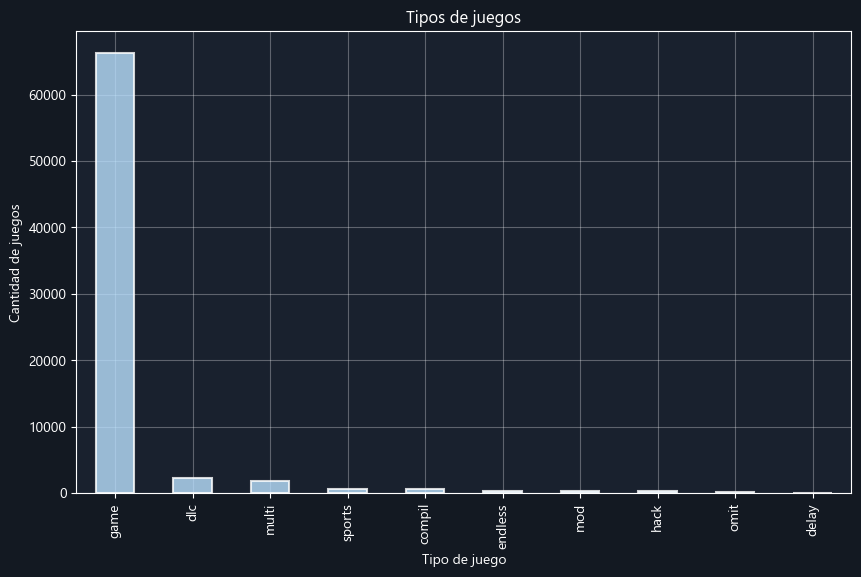

In [103]:
# Graficamos los tipos de juegos
fig, ax = plt.subplots(figsize=(10, 6))
data_clean['game_game_type'].value_counts().plot(kind='bar', color= "#BAE1FF", edgecolor='white',  linewidth=1.5, zorder=2, alpha=0.8)
plt.xlabel('Tipo de juego')
plt.ylabel('Cantidad de juegos')
fig.patch.set_facecolor("#131922")  # Fondo de la figura (exterior)
ax.set_facecolor("#19212E")         # Fondo del área del gráfico (interior)
plt.grid(zorder=1, alpha=0.3)
plt.title('Tipos de juegos')   

La mayoría es del tipo 'game' por lo cual no es concluyente si se ocupa esta categoría. Por último queda ver la distribución de juegos que tienen modalidades de solo player, cooperative y multiplayer. Para esto se va a crear una nueva variable usando los valores binarios que se tiene en las categorias, quedando por ejemplo:

<table>
    <tr><th>Código</th><th>Modos</th></tr>
    <tr><td>111</td><td>sp, co, mp</td></tr>
    <tr><td>100</td><td>sp</td></tr>
    <tr><td>101</td><td>sp, mp</td></tr>
</table>

Con esto para tener una distribución de los tipos de modalidades de juego posibles.

Text(0.5, 1.0, 'Modalidades de los juegos')

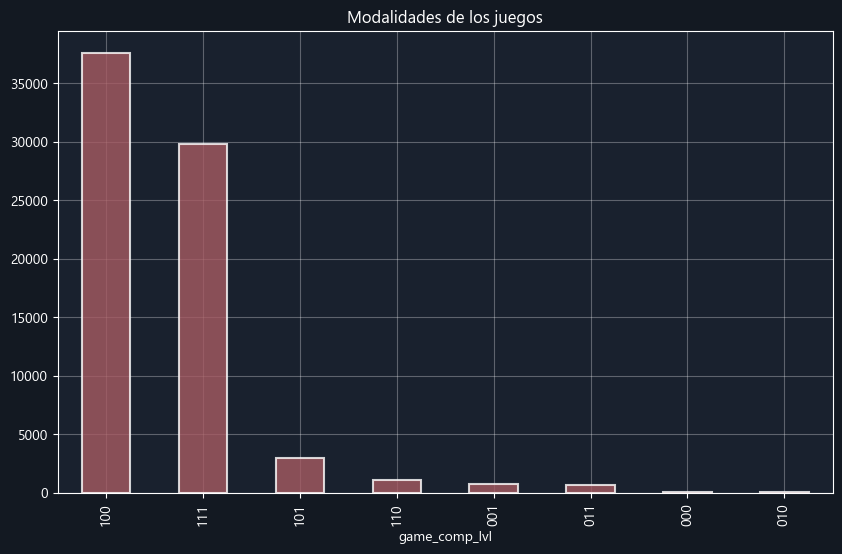

In [98]:
# Creamos nueva variable para ver modalidad de los juegos
data_clean['game_comp_lvl'] = data_clean[['game_comp_lvl_sp', 'game_comp_lvl_co', 'game_comp_lvl_mp']].apply(lambda x:''.join(x.astype(str)), axis=1)  

fig, ax = plt.subplots(figsize=(10, 6))
data_clean['game_comp_lvl'].value_counts().plot(kind='bar', edgecolor='white',  linewidth=1.5, zorder=2, alpha=0.8)
fig.patch.set_facecolor("#131922")  # Fondo de la figura (exterior)
ax.set_facecolor("#19212E")         # Fondo del área del gráfico (interior)
plt.grid(zorder=1, alpha=0.3)
plt.title('Modalidades de los juegos')
